<a href="https://colab.research.google.com/github/RashmiNirasha/airpass/blob/main/AirlineDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px

# Load dataset
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/test.csv')

df = pd.concat([df_train, df_test])
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [3]:
df.isna().sum() #A simpler way to find missing values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [4]:
df.dropna(inplace=True)  # Simple missing value handling

In [5]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True) # Handle missing values in 'Arrival Delay in Minutes' with median

<ipython-input-5-1d03f142e469>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True) # Handle missing values in 'Arrival Delay in Minutes' with median


In [6]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [7]:
df.duplicated().sum() #duplicate checking

0

In [8]:
# Encode 'Gender', 'Customer Type', 'Type of Travel', 'Class', and 'satisfaction'
label_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  
0                      18.0             0  
1                       6.0             0  
2                       0.0             1  
3                       9.0             0  
4                       0.0             1  

[5 rows x 23 columns]

In [9]:
scaler = MinMaxScaler()
df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.fit_transform(
    df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

df.head()


Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0       1              0  0.076923               1      2         0.086632   
1       1              1  0.230769               0      0         0.041195   
2       0              0  0.243590               0      0         0.224354   
3       0              0  0.230769               0      0         0.107229   
4       1              0  0.692308               0      0         0.036955   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                    0.015704   
1                 4            1                    0.000628   
2                 4            5                    0.000000   
3                 4            2                    0.006910   
4                 3            3                    0.000000   

   Arrival Delay in Minutes  satisfaction  
0                  0.011364             0  
1                  0.003788             0  
2                  0.000000             1  
3                  0.005682             0  
4                  0.000000             1  

[5 rows x 23 columns]

In [10]:
print(df.describe())

              Gender  Customer Type            Age  Type of Travel  \
count  129487.000000  129487.000000  129487.000000   129487.000000   
mean        0.492590       0.183138       0.415753        0.309236   
std         0.499947       0.386781       0.193815        0.462180   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.256410        0.000000   
50%         0.000000       0.000000       0.423077        0.000000   
75%         1.000000       0.000000       0.564103        1.000000   
max         1.000000       1.000000       1.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  129487.000000    129487.000000          129487.000000   
mean        0.593704         0.234089               2.728544   
std         0.621371         0.201446               1.329235   
min         0.000000         0.000000               0.000000   
25%         0.000000         0.077342            

<ipython-input-11-36dc20e2b7f3>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Neutral or dissatisfied','Satisfied'], fontsize=12)


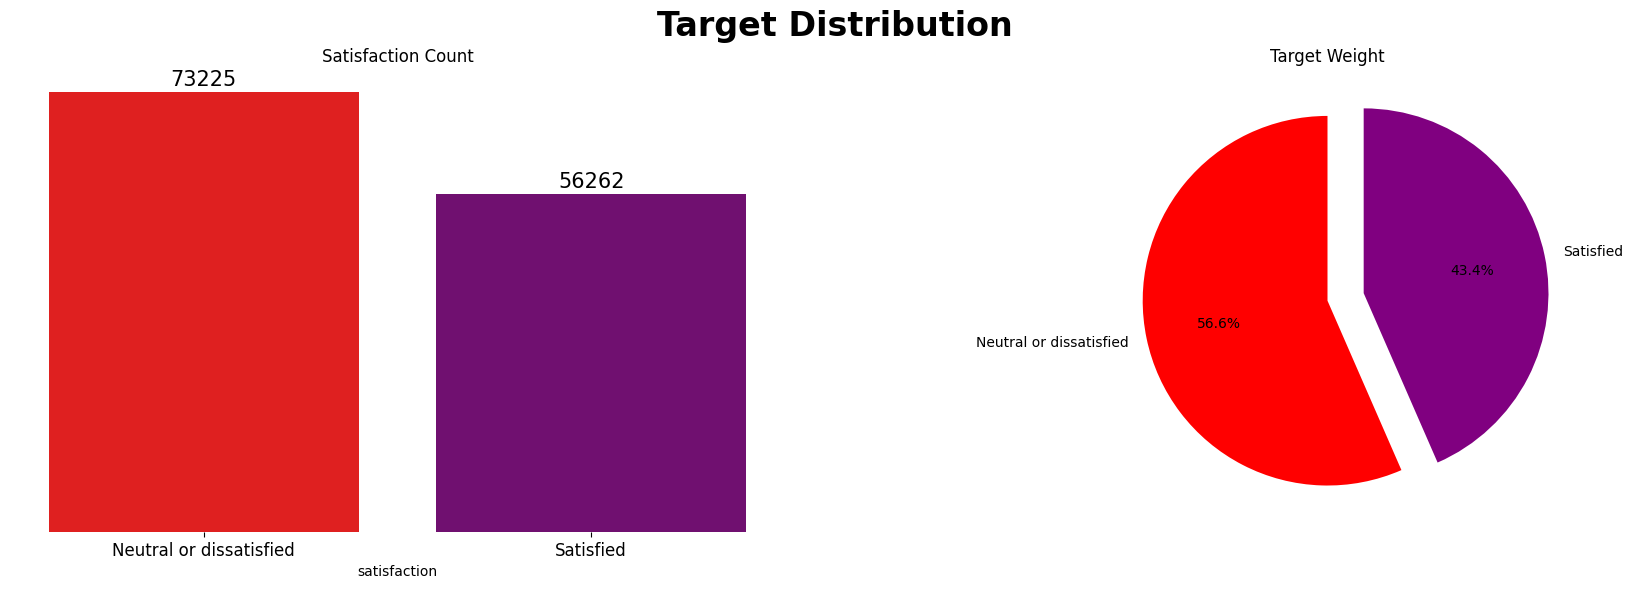

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

target_colors = ['red', 'purple']

fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution', weight='bold', fontsize=24)

grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# Satisfaction Count Plot
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Satisfaction Count')

sns.countplot(x='satisfaction', hue='satisfaction', data=df, ax=ax1, palette=target_colors, legend=False)

# Remove border and y-axis
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.get_yaxis().set_visible(False)

# Add annotations
for index, value in enumerate(df['satisfaction'].value_counts()):
    ax1.annotate(value, xy=(index, value + 2000), ha='center', va='center', fontsize=15)

# Set x-axis labels size
ax1.set_xticklabels(['Neutral or dissatisfied','Satisfied'], fontsize=12)

# Pie Plot
ax2 = fig.add_subplot(grid[0, 1:])
ax2.set_title('Target Weight')

labels = ['Neutral or dissatisfied','Satisfied']
values = list(df['satisfaction'].value_counts().values)

ax2.pie(values, labels=labels, autopct='%1.1f%%', explode=(0, 0.2), startangle=90, colors=target_colors)

plt.show()

<ipython-input-12-6ad3dffe19b3>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(fontsize=20)


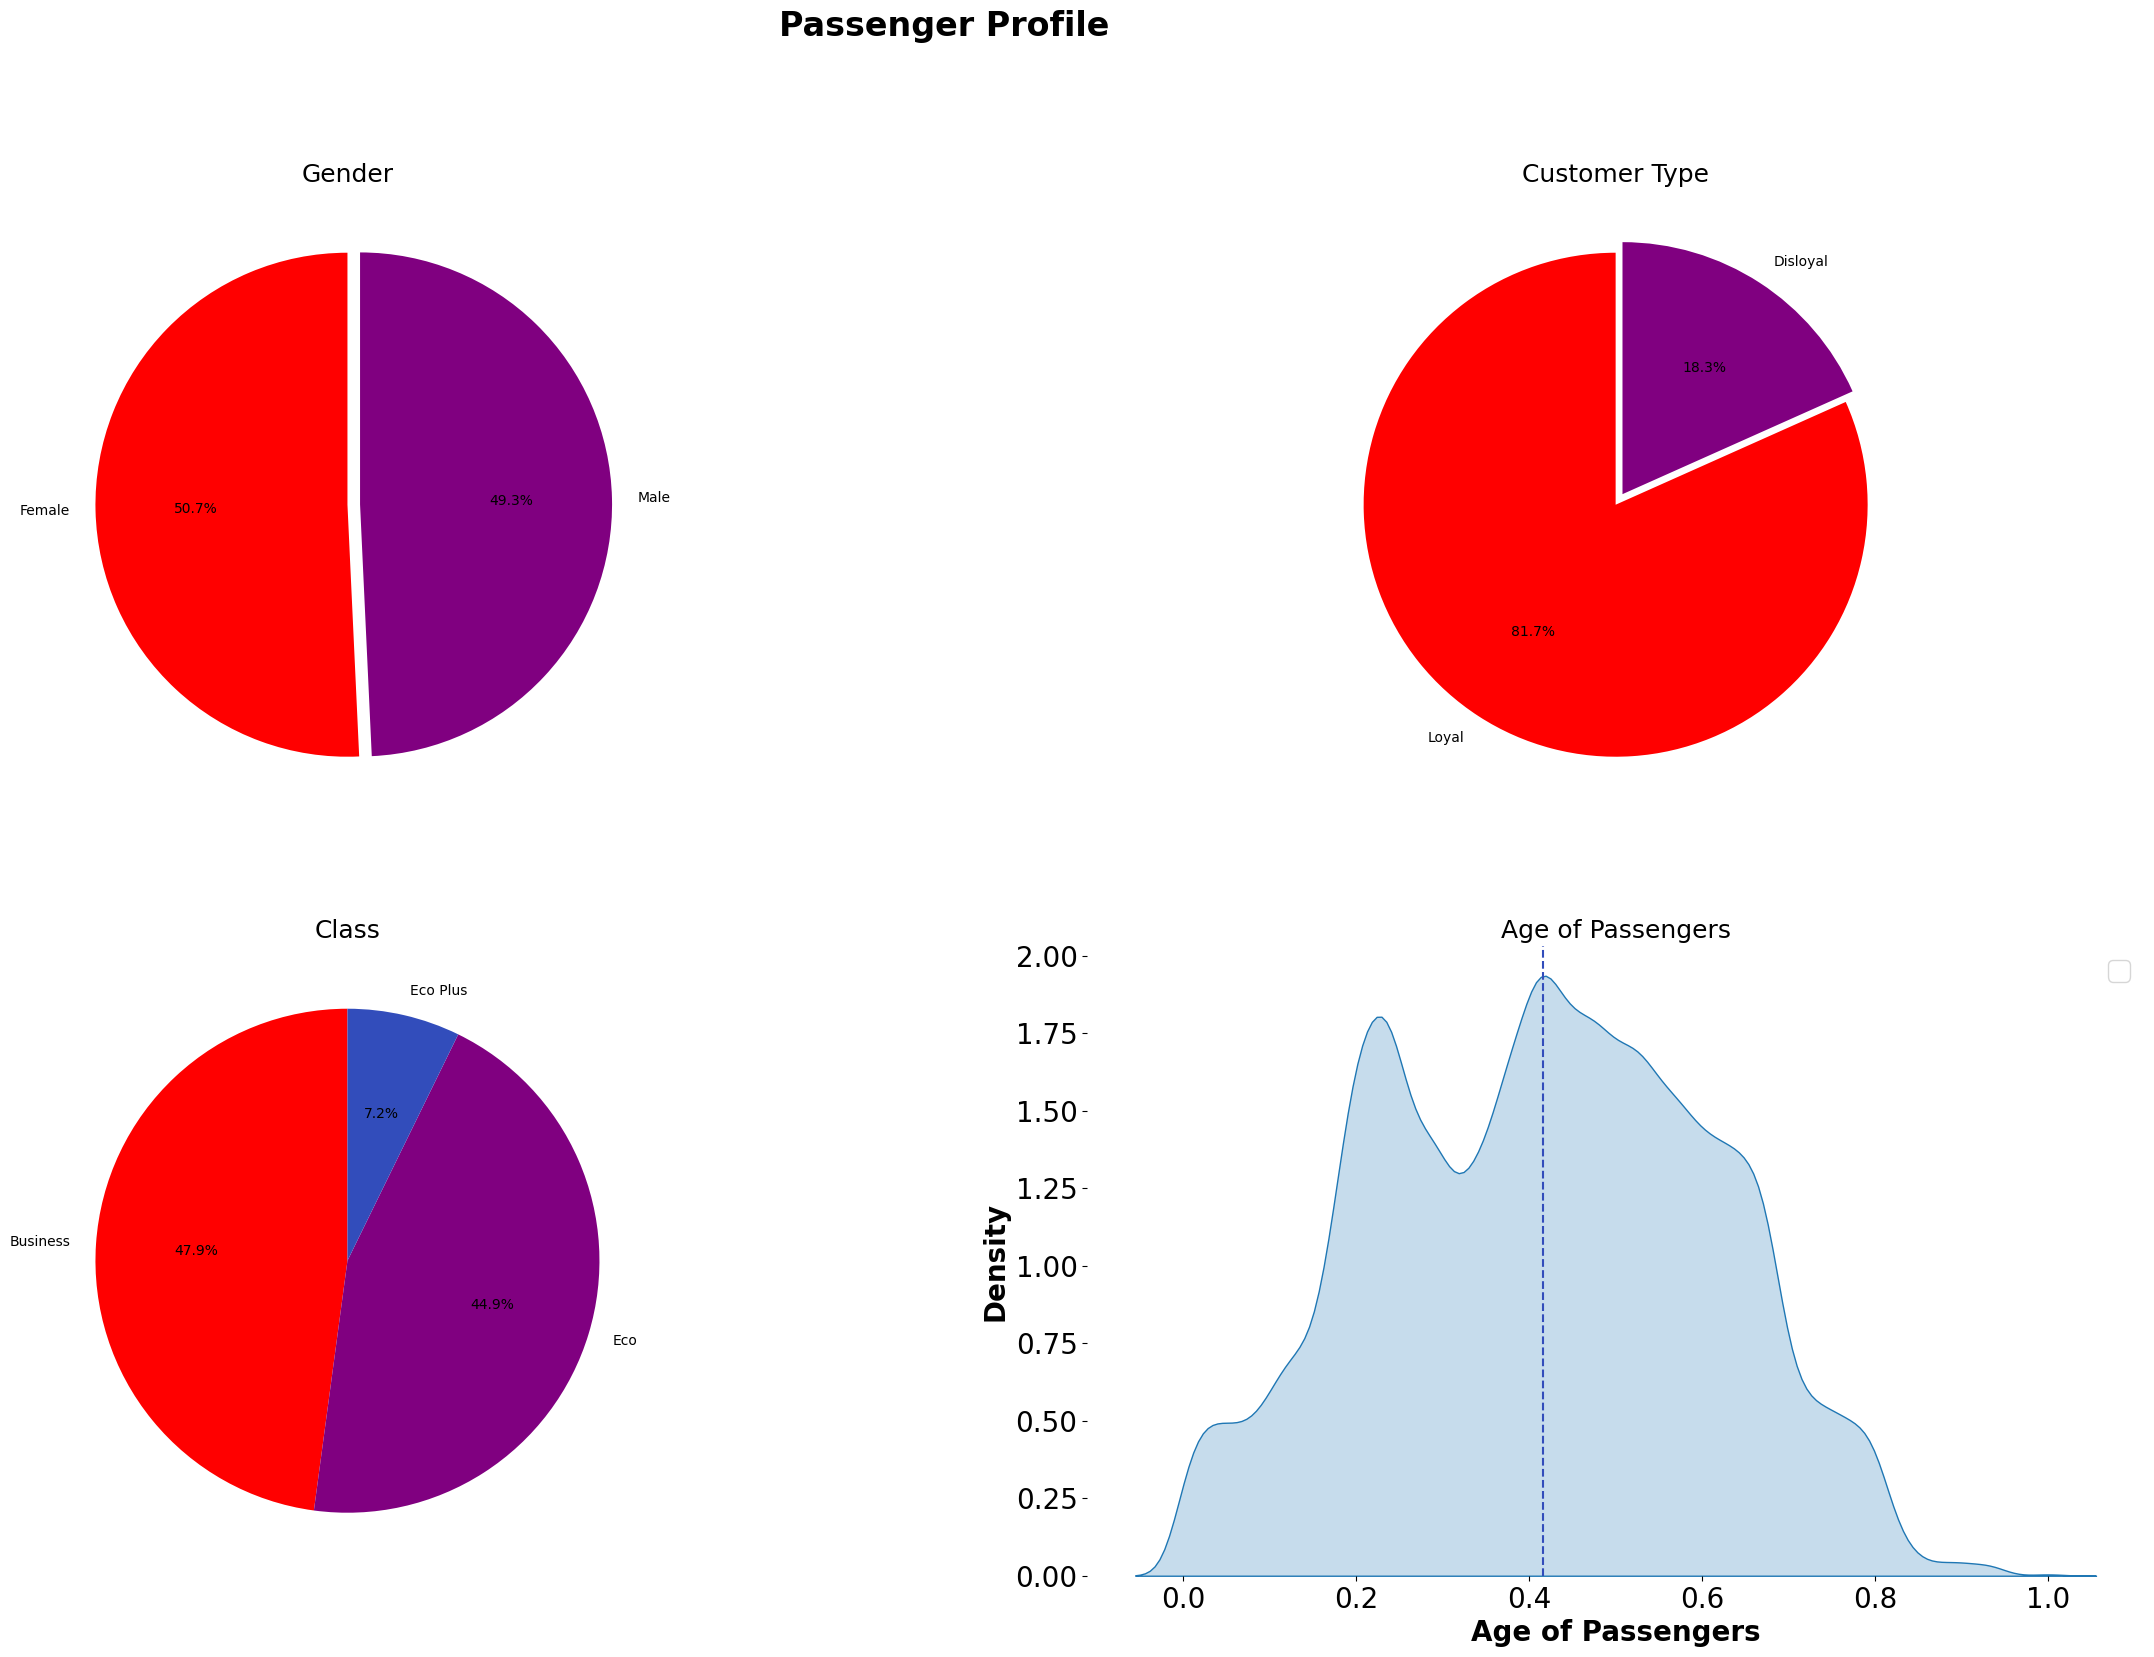

In [12]:
#gender, customertype , class und age

fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile', weight='bold', fontsize=24)

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender', fontsize=18)

label=['Female','Male']
value=list(df['Gender'].value_counts().values)
#pie chart
ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.05), startangle =90, colors =target_colors)


ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize=18)

label=['Loyal','Disloyal']
value=list(df['Customer Type'].value_counts().values)
#pie chart
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.05), startangle =90, colors =target_colors)

#dritter plot

ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Class', fontsize=18)
label=['Business','Eco','Eco Plus']
value=list(df['Class'].value_counts().values)
#pie chart
ax3.pie(value, labels=label, autopct='%1.1f%%', startangle =90, colors =target_colors+['#324DBB'])

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age of Passengers', fontsize=18)

sns.kdeplot(data=df, x='Age', ax=ax4, fill=True)

ax4.tick_params(axis='x',labelsize = 20)
ax4.tick_params(axis='y',labelsize = 20)

ax4.set_xlabel('Age of Passengers', fontsize=20, weight ='bold')
ax4.set_ylabel('Density', fontsize=20, weight ='bold')

for spine in ax4.spines.values():
    spine.set_visible(False)

ax4.axvline(df['Age'].mean(), linestyle='--', color='#324DBB')
ax4.legend(fontsize=20)

plt.show()

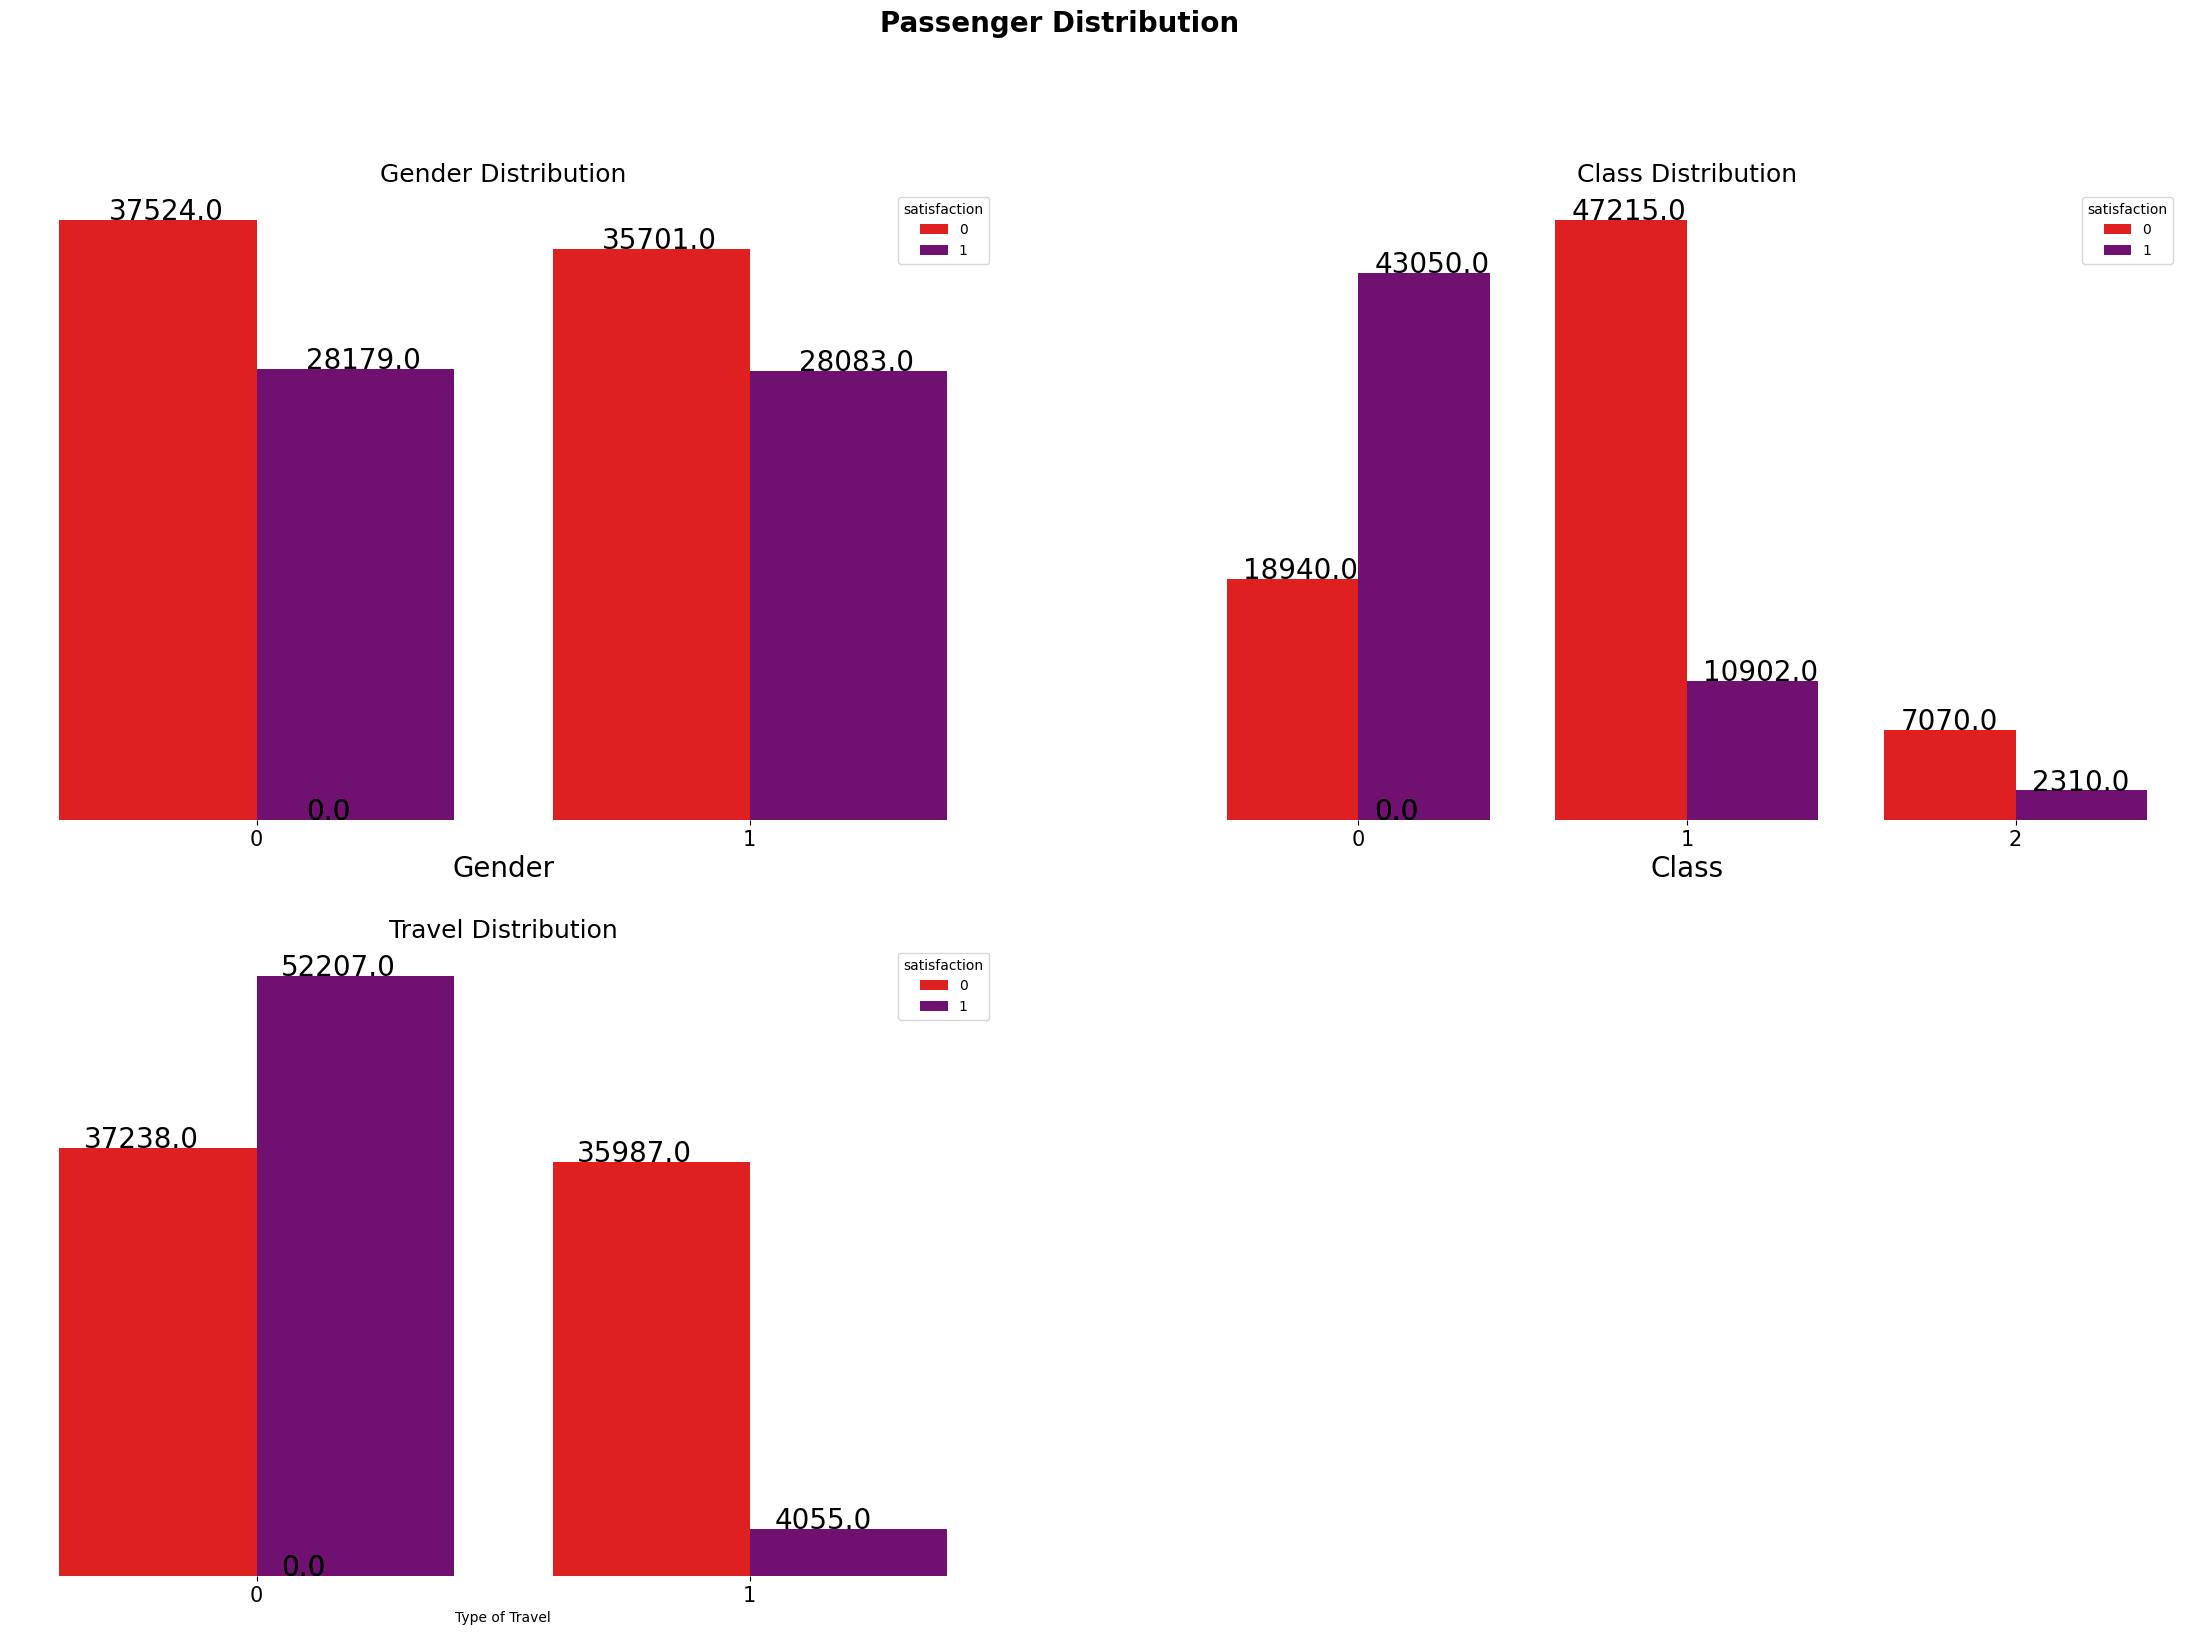

In [13]:

fig = plt.figure(figsize=(28, 18))
plt.suptitle('Passenger Distribution', weight='bold', fontsize=20)

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender Distribution', fontsize=18)


sns.countplot(x=df['Gender'], hue=df['satisfaction'], ax=ax1, palette=target_colors)

for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1,p.get_height()), fontsize=20)

ax1.get_yaxis().set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_xlabel('Gender', fontsize=20)

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax2 = fig.add_subplot(grid[0, 1:])
ax2.set_title('Class Distribution', fontsize=18)

sns.countplot(x=df['Class'], hue=df['satisfaction'], ax=ax2, palette=target_colors)

for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05,p.get_height()), fontsize=20)

ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_xlabel('Class', fontsize=20)

#############

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax3 = fig.add_subplot(grid[1, :1])
ax3.set_title('Travel Distribution', fontsize=18)

sns.countplot(x=df['Type of Travel'], hue=df['satisfaction'], ax=ax3, palette=target_colors)

for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05,p.get_height()), fontsize=20)

ax3.get_yaxis().set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.tick_params(axis='x', labelsize=15)



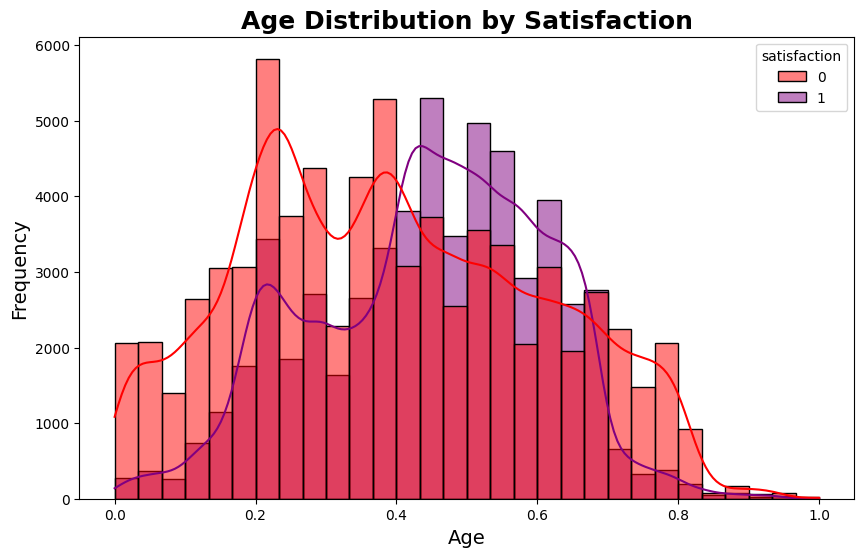

In [14]:
# --- Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='satisfaction', bins=30, kde=True, palette=target_colors)
plt.title('Age Distribution by Satisfaction', fontsize=18, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

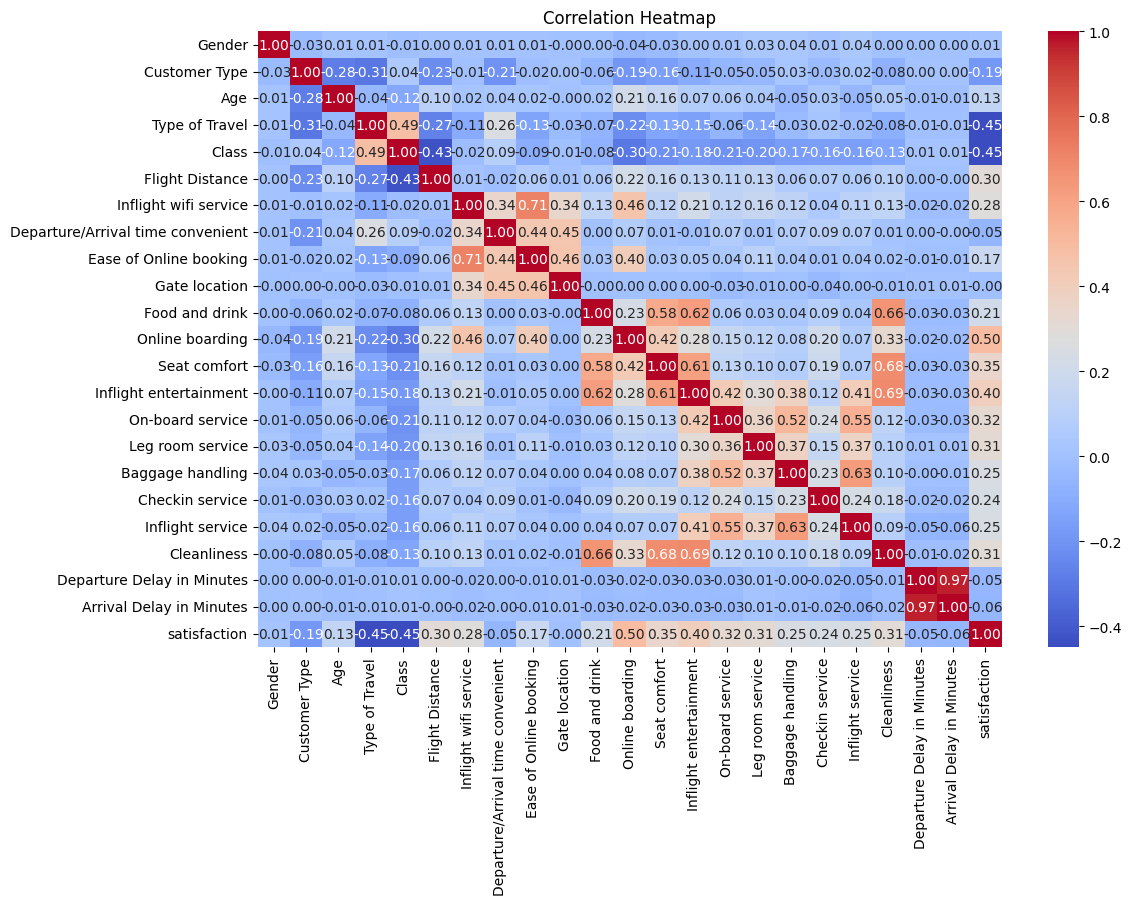

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
correlation = df.corr()['satisfaction'].sort_values(ascending=False)
print("Correlation with satisfaction:\n", correlation)

Correlation with satisfaction:
 satisfaction                         1.000000
Online boarding                      0.501620
Inflight entertainment               0.398334
Seat comfort                         0.348576
On-board service                     0.322329
Leg room service                     0.312557
Cleanliness                          0.306891
Flight Distance                      0.298206
Inflight wifi service                0.283291
Baggage handling                     0.248651
Inflight service                     0.245027
Checkin service                      0.237146
Food and drink                       0.211164
Ease of Online booking               0.168704
Age                                  0.134001
Gender                               0.011496
Gate location                       -0.002923
Departure Delay in Minutes          -0.051032
Departure/Arrival time convenient   -0.054457
Arrival Delay in Minutes            -0.058275
Customer Type                       -0.185925
Cl

In [17]:
# Define features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8757819136612865
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14668
           1       0.87      0.84      0.85     11230

    accuracy                           0.88     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.88      0.88      0.88     25898



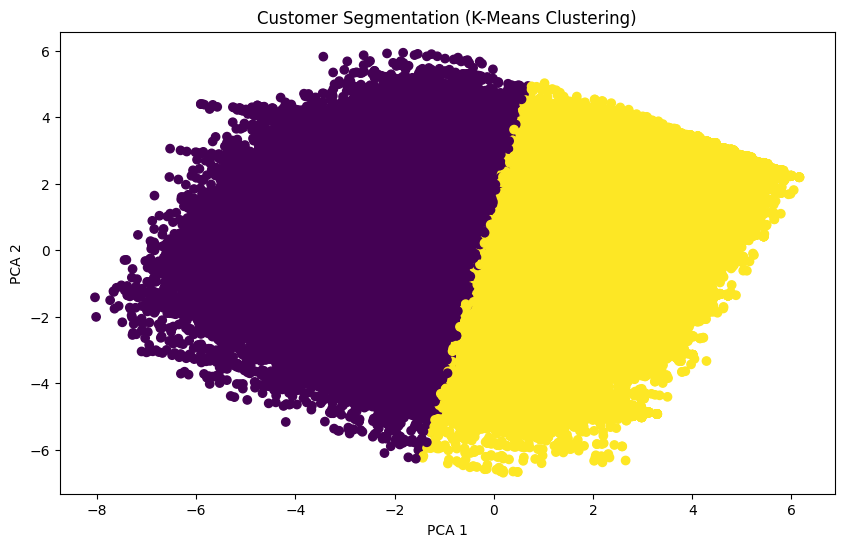

In [18]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [19]:
# Interactive scatter plot
fig = px.scatter(df, x='Flight Distance', y='Departure Delay in Minutes', color='satisfaction',
                 title='Flight Distance vs. Departure Delay by Satisfaction')
fig.show()

# Box plot for Age vs. Satisfaction
fig = px.box(df, x='satisfaction', y='Age', title='Age Distribution by Satisfaction')
fig.show()